## Overview of Search Algorithm Performance Analysis

This program is designed to evaluate the performance of three fundamental search algorithms: linear search, binary search, and Fibonacci search. Through a series of experiments, it measures the execution times of these algorithms across various list sizes, providing insights into their efficiency and scalability. The results are recorded and analyzed, allowing for a detailed comparison of how each algorithm performs under increasing data sizes.

### Program Structure

1. **Search Algorithm Implementations**
   - **Linear Search**: A simple algorithm that checks every element in the list until the target is found. Its performance is generally linear, making it slower as the list size increases.
   - **Binary Search**: An efficient algorithm that continually splits the list in half, reducing the search area significantly with each step. It requires a sorted list but offers logarithmic performance, making it much faster than linear search for large datasets.
   - **Fibonacci Search**: A less common but interesting algorithm that uses Fibonacci numbers to divide the search space. Similar to binary search, it requires a sorted list and provides performance benefits that can be particularly noticeable on sequential access media.

2. **Timing Function**
   - This function runs each search algorithm on lists of predetermined sizes, capturing execution times using Python's `timeit` module. The sizes tested range from 1,000 to 1,000,000 elements, providing a broad spectrum for performance analysis.

3. **Data Output and Visualization**
   - **CSV Output**: Results for each algorithm and list size are saved to a CSV file in scientific notation, ensuring precise and readable data storage.
   - **Graphical Visualization**: Using Matplotlib, the average execution times are plotted on logarithmic scales. This visualization aids in understanding the growth patterns and efficiency differences between the algorithms.

### Execution Flow

- The program begins by defining the list sizes to test.
- It then performs the timing experiments using the `time_searches` function.
- Results are output to a CSV file for offline analysis.
- Finally, performance data is visually represented in a plot, showcasing the comparative speeds and efficiencies of the search algorithms across varying list sizes.

### Usage

This program is useful for students and professionals alike who are interested in understanding and demonstrating algorithmic efficiency, especially in the context of search operations. By analyzing the performance data, one can make informed decisions about which algorithm might be best suited for a particular application based on the data's characteristics and size.



## Module Imports Overview

In this program, we utilize several Python modules to perform tasks related to data manipulation, timing, statistical analysis, and visualization. Below is a breakdown of each import and its purpose within the context of analyzing the performance of search algorithms:

### Standard Library Imports

- **`random`**: This module is used to generate random numbers. We use it to create random lists of integers and to select random target values for the search algorithms to find. This simulates realistic scenarios where the position of the target can vary.

- **`csv`**: The `csv` module is employed to handle CSV file operations. In this program, it is used to write the results of the timing experiments to a CSV file, allowing for easy storage and later analysis of the data.

- **`timeit`**: Utilized for performance measurement, `timeit` allows us to accurately measure the execution time of small code snippets, in this case, the search algorithms. It helps in providing a precise benchmark by timing the code repeatedly in a controlled environment.

- **`statistics`**: This module provides functions for calculating mathematical statistics of numeric data. We use it to compute the mean, minimum, and maximum times from the collected timing data, aiding in the analysis of algorithm performance.

### Third-Party Library Import

- **`matplotlib.pyplot`**: Part of the Matplotlib library, `pyplot` is used for creating static, interactive, and animated visualizations in Python. In this program, it's used to plot the results of the search algorithms' performance, offering a visual representation of their efficiency across different list sizes.

### Typing Imports

- **`from typing import List, Dict`**: These imports from the `typing` module are used to enhance the readability and maintainability of the code by specifying the types of data structures used (like lists and dictionaries). Type hints help in documenting the code and can aid developers and tools in catching type-related errors more easily.

### Usage

These imports are critical for ensuring the program runs efficiently and effectively, providing the necessary tools to measure, record, and visualize the performance of different search algorithms. Each module complements the others by handling specific aspects of the program, from data handling and timing to statistical analysis and graphical output.


In [134]:
import random
import csv
import timeit
import statistics
from typing import List, Tuple
import matplotlib.pyplot as plt
from typing import List, Dict
import cProfile




In [136]:

# Search Algorithms
def linear_search(arr: List[int], target: int) -> int:
    """Return index of target using linear search or -1 if not found."""
    for index, value in enumerate(arr):
        if value == target:
            return index
    return -1



In [138]:

def binary_search(arr: List[int], target: int) -> int:
    """Return index of target using binary search or -1 if not found."""
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1



## Introduction
*Fibonacci Search* is a comparison-based technique that utilizes Fibonacci numbers to search an element in a sorted array. This method uses a *divide and conquer* strategy that narrows down possible locations with the aid of Fibonacci numbers, which reduces the scope of the search with each step more efficiently than a simple binary search in some cases.

## Understanding Gained from AI Conversation
Through an enlightening conversation with an AI (*ChatGPT*), the intricate details of the *Fibonacci Search algorithm* were demystified. This discussion helped clarify how Fibonacci numbers are applied to optimize the search process in sorted arrays, making the algorithm both interesting and practical.


**Initialization**

fibM2, fibM1, and fibM: These are the two previous Fibonacci numbers and the current Fibonacci number, respectively. The sequence starts with Fibonacci numbers 0 and 1.
fibM2 is the second-to-last Fibonacci number in the sequence used for indexing.
fibM1 is the last Fibonacci number in the sequence.
fibM is the current Fibonacci number and is recalculated in each iteration of the first loop.

**Fibonacci Number Generation**

This loop continues to calculate the next Fibonacci number until it is large enough to be equal to or larger than the size of the array. This ensures that the searches in the subsequent steps have a valid Fibonacci reference that fits within the bounds of the array.

**Search Process**

offset: Initially set to -1, used to adjust the range in the array where the next element will be checked.
i: It calculates the index to be checked next. It ensures that the index stays within the bounds of the array using min(). The offset helps move the "window" of the array being checked, progressively narrowing down the search space.

Adjusting Fibonacci Levels
Depending on whether the target is less than or greater than arr[i], the Fibonacci numbers are adjusted to narrow the search:
If arr[i] is less than the target, the search "window" shifts to the right, and the Fibonacci numbers are adjusted to decrease the search range.
If arr[i] is greater than the target, the search range narrows down to the left side.

**Final Check and Return**

After exiting the main loop, a final check is done for the next element in the array because when fibM becomes 1, the last element has not yet been checked.
If the target is not found throughout the loops and final check, -1 is returned, indicating the target does not exist in the array.


In [142]:


def fibonacci_search(arr: List[int], target: int) -> int:
    """Return index of target using Fibonacci search or -1 if not found."""
    fibM2 = 0  # (m-2)'th Fibonacci
    fibM1 = 1  # (m-1)'th Fibonacci
    fibM = fibM2 + fibM1  # m'th Fibonacci

    while (fibM < len(arr)):
        fibM2 = fibM1
        fibM1 = fibM
        fibM = fibM2 + fibM1

    offset = -1

    while (fibM > 1):
        i = min(offset + fibM2, len(arr) - 1)

        if arr[i] < target:
            fibM = fibM1
            fibM1 = fibM2
            fibM2 = fibM - fibM1
            offset = i
        elif arr[i] > target:
            fibM = fibM2
            fibM1 = fibM1 - fibM2
            fibM2 = fibM - fibM1
        else:
            return i

    if fibM1 and offset + 1 < len(arr) and arr[offset + 1] == target:
        return offset + 1

    return -1


**Parameters:**

***list_sizes:*** A list of integers, each representing the size of a list to generate and search.
repetitions: The number of times each search is repeated, default is 500, to ensure statistical significance in the results.
Detailed Steps and Processes
Initialization:

A list results is initialized to store the timing results for each search algorithm across different list sizes.
Loop Over Each List Size:

For each size in list_sizes:
Data Preparation:
Generate a sorted list of unique integers. The range of numbers is set to ten times the list size to ensure uniqueness.
Select a target integer from the sorted list randomly to be the search target.
Time Collection:
timeit.repeat is used to measure the time taken to find the target using each search method, repeated according to repetitions.

***Linear Search:*** Measures how long it takes to search through the sorted list, which does not benefit from the list being sorted.

***Binary Search:*** Measures the time for searching through the sorted list, leveraging the sort order.

***Fibonacci Search:*** Similar to binary search, it measures time in the sorted list, utilizing the properties of Fibonacci numbers.

***Results Storage:***
Calculate the minimum, average, and maximum times for each algorithm.
Append these statistics along with the list size to the results list in the form of dictionaries.

Return:
The function returns the results list, which contains comprehensive timing data for each algorithm and list size.

**CITATION**: CHATGPT(openAI,GPT 4o,  Thursday 4:05PM Feb 6th 2025) was used to understand implemention and learning timeIt function details.
**THE AUTHOR OF THE CODE LEARED AND COMMENTED THE CODE BASED ON THE LEARNING**
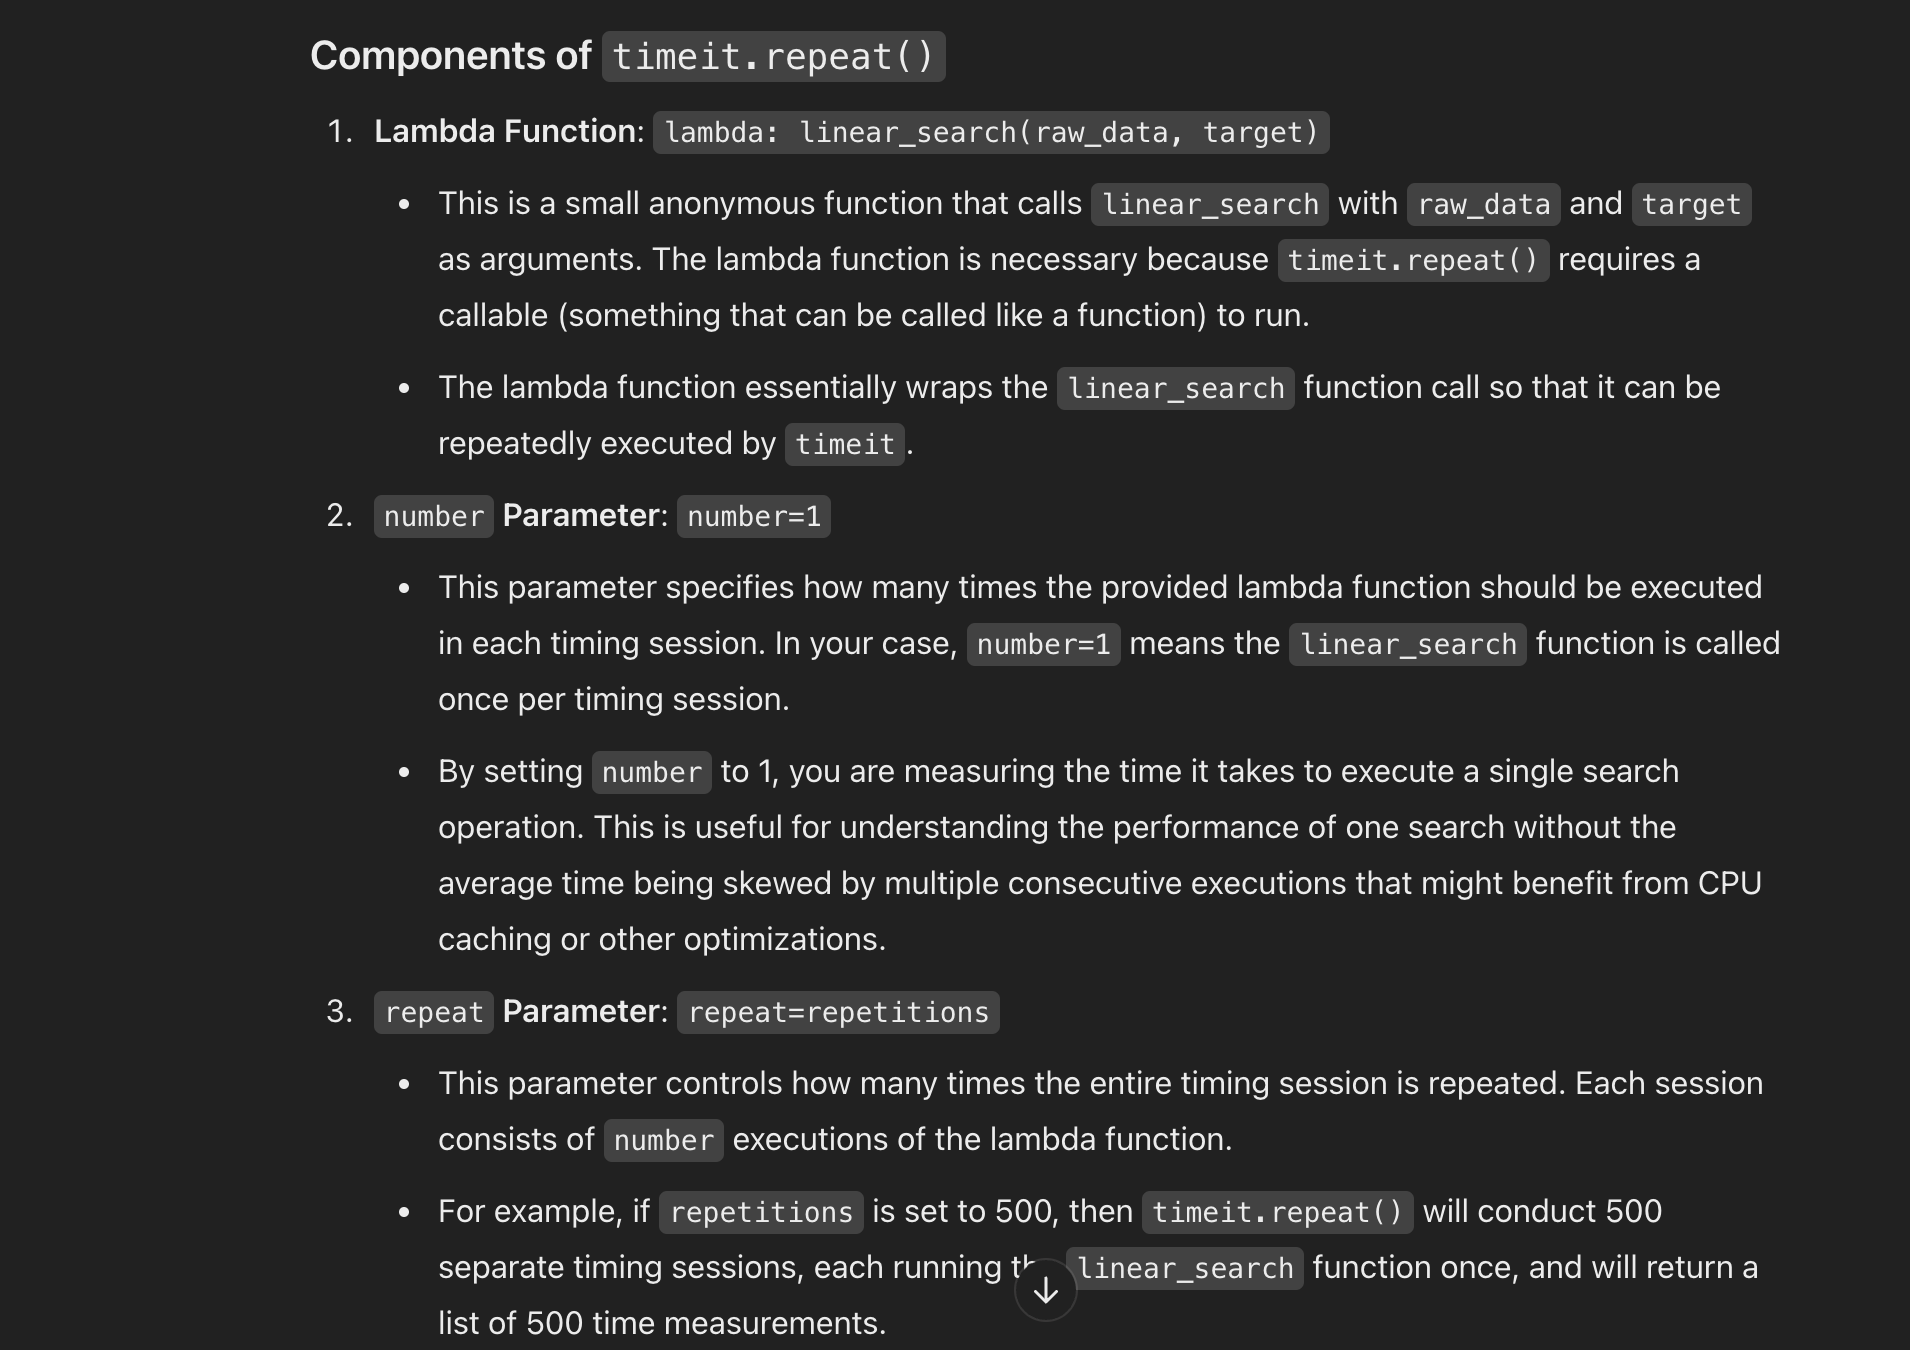]
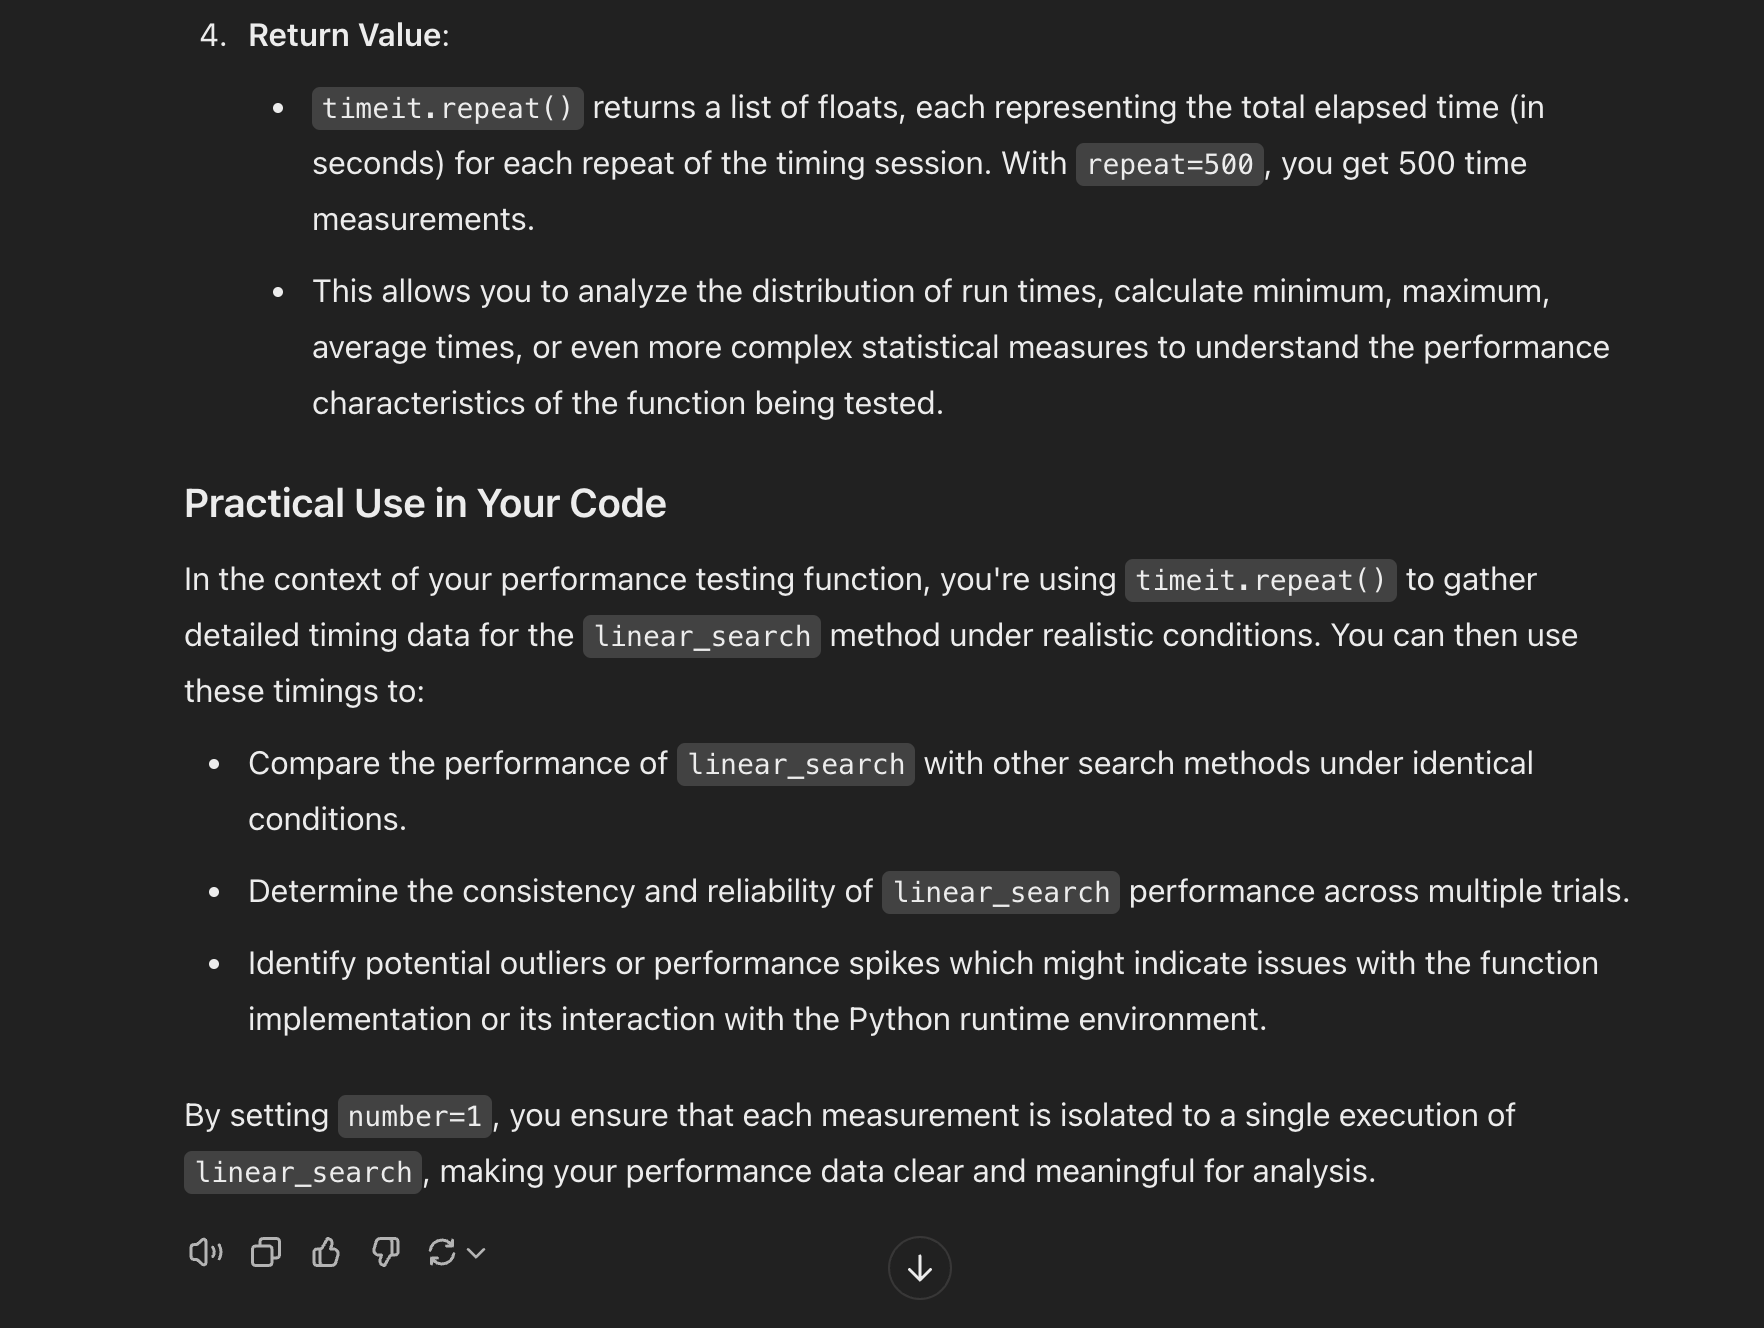]



In [145]:
# Timing Function
def time_searches(list_sizes: List[int], repetitions: int = 500) -> List[Dict]:
    results = []
    for size in list_sizes:
        # Generate a list of random, unique integers. This unsorted list is used for linear search
        # because linear search does not require sorted data. This mirrors real-world scenarios where
        # data might not always be pre-sorted.
        raw_data = random.sample(range(size * 10), size)

        # Select a target from the raw data to ensure the target is present in the dataset. This target
        # is used for all search methods to maintain consistency across tests.
        target = random.choice(raw_data)

        # Time Linear Search on unsorted data
        # Linear search goes through each element in the list sequentially until the target is found.
        # It is timed using the `timeit.repeat` function to measure performance without sorting overhead.
        linear_times = timeit.repeat(lambda: linear_search(raw_data, target), number=1, repeat=repetitions)

        # Prepare sorted data for binary and Fibonacci searches
        # Sorting is performed once outside the timing loop for these searches because both require
        # data to be in sorted order to function correctly. This approach avoids the inefficiency of sorting
        # during each repetition and better represents typical usage where data is sorted prior to multiple searches.
        sorted_data = sorted(raw_data)

        # Time Binary Search on sorted data
        # Binary search divides the data into halves, checking the middle element to quickly locate the target.
        # This method significantly reduces the search time and is especially efficient on large, sorted datasets.
        binary_times = timeit.repeat(lambda: binary_search(sorted_data, target), number=1, repeat=repetitions)

        # Time Fibonacci Search on sorted data
        # Fibonacci search uses a division based on Fibonacci numbers to access elements, combining the efficiency
        # of binary search with a reduced reliance on random access, beneficial on sequential access media.
        fibonacci_times = timeit.repeat(lambda: fibonacci_search(sorted_data, target), number=1, repeat=repetitions)

        # Store the collected timings for each algorithm and the current list size in the results list.
        # This dictionary includes the minimum, average, and maximum times recorded for each search method,
        # providing a comprehensive view of each algorithm's performance across repeated trials.
        results.append({
            'size': size,
            'linear_min': min(linear_times),
            'linear_avg': statistics.mean(linear_times),
            'linear_max': max(linear_times),
            'binary_min': min(binary_times),
            'binary_avg': statistics.mean(binary_times),
            'binary_max': max(binary_times),
            'fibonacci_min': min(fibonacci_times),
            'fibonacci_avg': statistics.mean(fibonacci_times),
            'fibonacci_max': max(fibonacci_times)
        })
    return results


In [147]:

import csv

def output_to_csv(results):
    try:
        with open('search_algorithm_timings.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([
                'List Size',
                'Linear Min (µs)', 'Linear Avg (µs)', 'Linear Max (µs)',
                'Binary Min (µs)', 'Binary Avg (µs)', 'Binary Max (µs)',
                'Fibonacci Min (µs)', 'Fibonacci Avg (µs)', 'Fibonacci Max (µs)'
            ])
            for result in results:
                writer.writerow([
                    result['size'],
                    f"{result['linear_min'] * 1_000_000:.4e}", f"{result['linear_avg'] * 1_000_000:.4e}", f"{result['linear_max'] * 1_000_000:.4e}",
                    f"{result['binary_min'] * 1_000_000:.4e}", f"{result['binary_avg'] * 1_000_000:.4e}", f"{result['binary_max'] * 1_000_000:.4e}",
                    f"{result['fibonacci_min'] * 1_000_000:.4e}", f"{result['fibonacci_avg'] * 1_000_000:.4e}", f"{result['fibonacci_max'] * 1_000_000:.4e}"
                ])
    except Exception as e:
        print(f"Failed to write to CSV: {e}")



**Learning Matplotlib commands using ChatGPT -4 , Thursday Feb 6 5:00 PM , 2025**
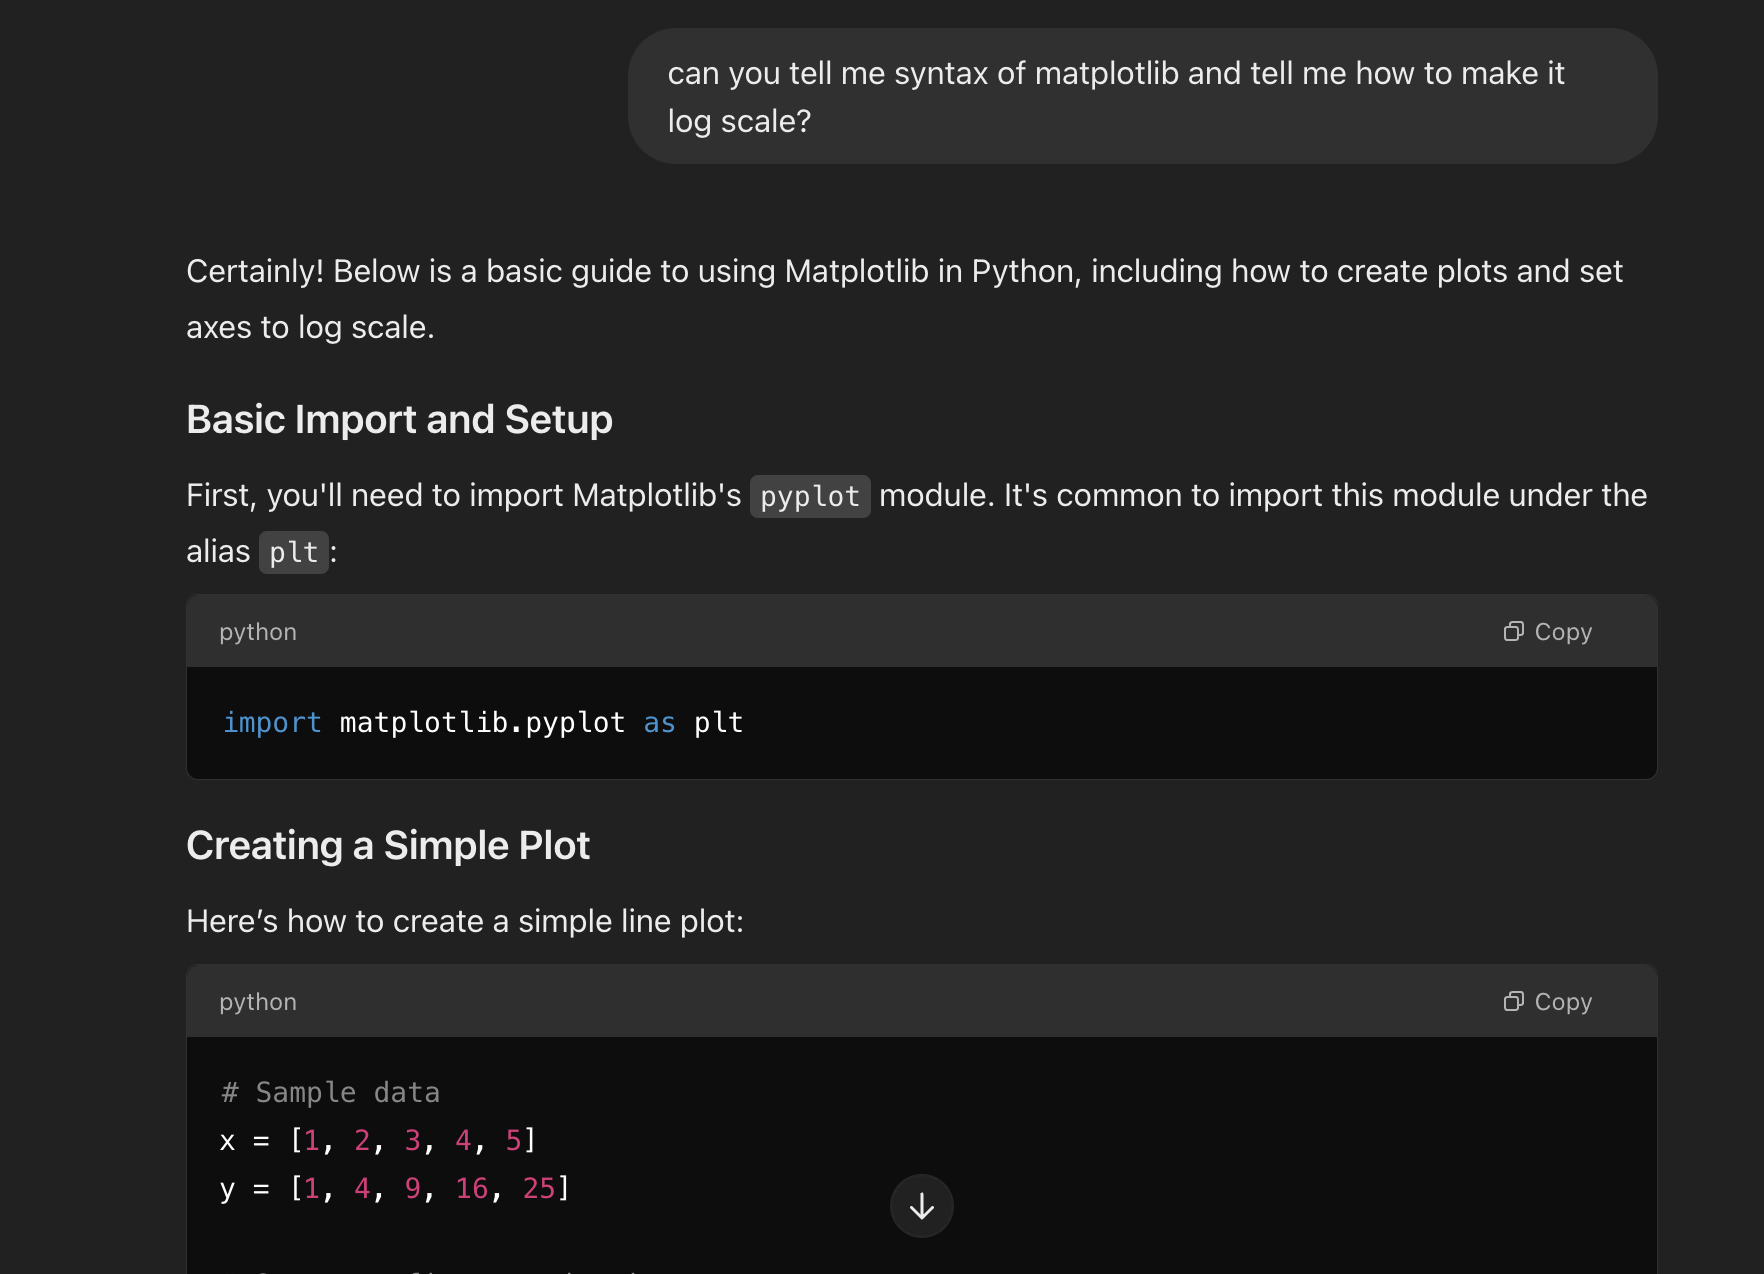
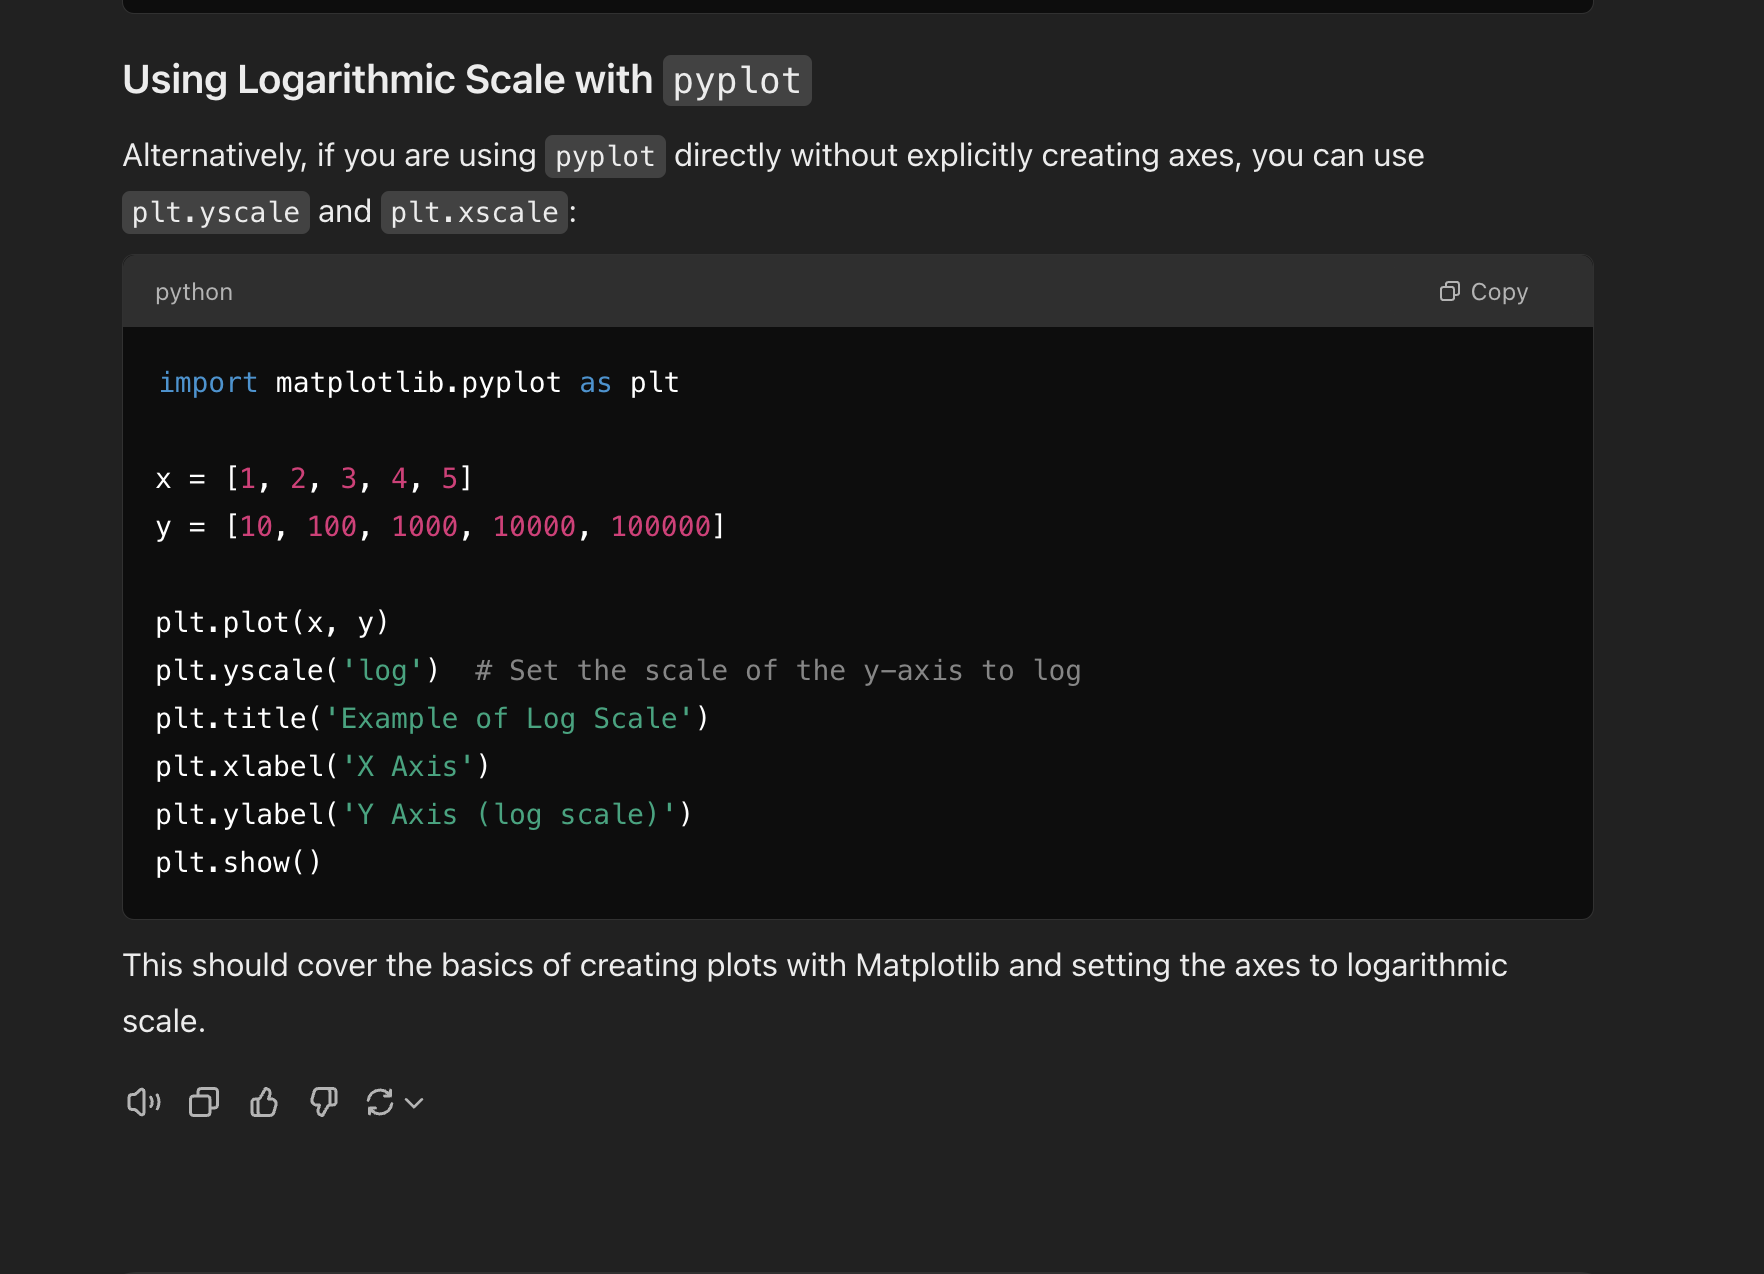
**The below plot function is not completlely copied from chatbot, but just learned the syntax and done by Tushar**


In [150]:
import matplotlib.pyplot as plt

def plot_results(results):
    sizes = [res['size'] for res in results]

    # Extracting all relevant times for each search method
    linear_mins = [res['linear_min'] for res in results]
    linear_avgs = [res['linear_avg'] for res in results]
    linear_maxs = [res['linear_max'] for res in results]

    binary_mins = [res['binary_min'] for res in results]
    binary_avgs = [res['binary_avg'] for res in results]
    binary_maxs = [res['binary_max'] for res in results]

    fibonacci_mins = [res['fibonacci_min'] for res in results]
    fibonacci_avgs = [res['fibonacci_avg'] for res in results]
    fibonacci_maxs = [res['fibonacci_max'] for res in results]

    # Plotting each type of time for each algorithm
    plt.figure(figsize=(12, 8))
    plt.plot(sizes, linear_mins, 'r--', label='Linear Min', marker='o')
    plt.plot(sizes, linear_avgs, 'r-', label='Linear Avg', marker='o')
    plt.plot(sizes, linear_maxs, 'r:', label='Linear Max', marker='o')
    
    plt.plot(sizes, binary_mins, 'g--', label='Binary Min', marker='o')
    plt.plot(sizes, binary_avgs, 'g-', label='Binary Avg', marker='o')
    plt.plot(sizes, binary_maxs, 'g:', label='Binary Max', marker='o')
    
    plt.plot(sizes, fibonacci_mins, 'b--', label='Fibonacci Min', marker='o')
    plt.plot(sizes, fibonacci_avgs, 'b-', label='Fibonacci Avg', marker='o')
    plt.plot(sizes, fibonacci_maxs, 'b:', label='Fibonacci Max', marker='o')
    
    plt.xlabel('List Size')
    plt.ylabel('Time (seconds)')
    plt.title('Search Algorithm Performance Comparison')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()


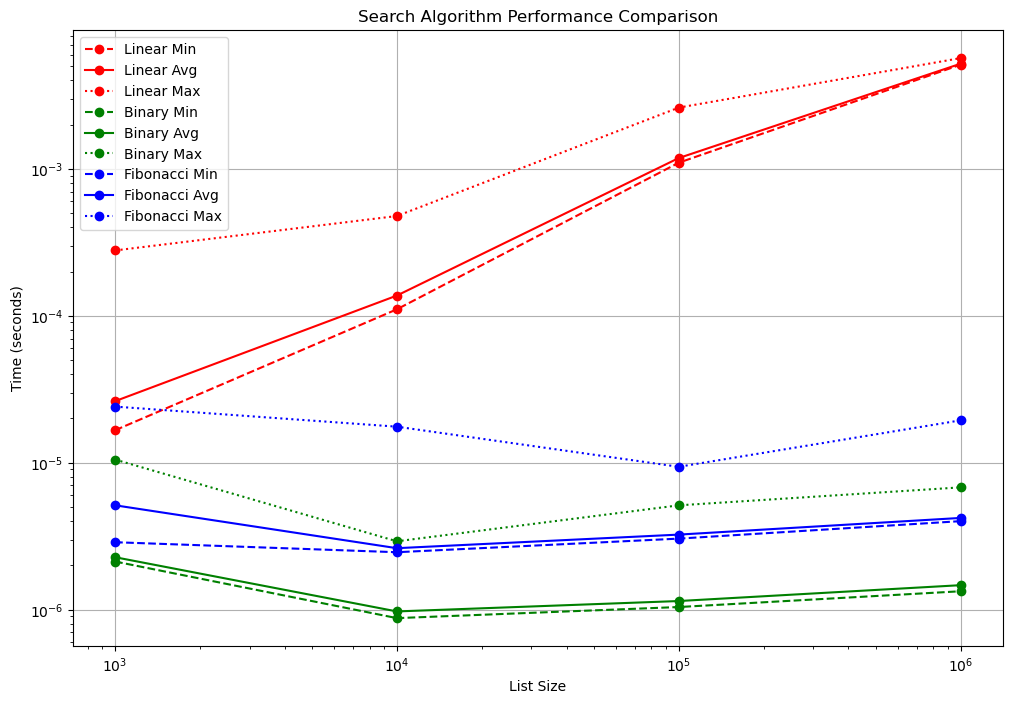

In [152]:
if __name__ == '__main__':
    # List sizes for the experiment
    list_sizes = [10**3,10**4,10**5,10**6]  

    # Perform the timing experiments
    results = time_searches(list_sizes)

    # Output results to a CSV file
    output_to_csv(results)

    # plot_results(results)

    plot_results(results)


**From the result, I am spending most of the time in Linear search if we neglect inbuilt calls!**